# Experiment
classification task of Annealing Data

## Data preprocessing

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Load the dataset
train = pd.read_csv('./variants/1/anneal.data',header=None)
test = pd.read_csv('./variants/1/anneal.test',header=None)

all_data = pd.concat([train, test], ignore_index = True, sort=False)

#Print the first 5 rows of the dataframe.
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [3]:
#Let's observe the shape of the dataframe.
all_data.shape

(898, 39)

In [4]:
train.shape

(798, 39)

In [5]:
all_data.describe()

,3,4,8,32,33,34,36
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,3.634744,11.776169,30.668151,1.198549,780.653341,1263.094655,28.173719
std,13.716845,24.750528,114.956243,0.871208,405.345688,1871.399107,124.560341
min,0.000000,0.000000,0.000000,0.240000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,0.000000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,700.000000,4.000000,1525.000000,4880.000000,600.000000


In [6]:
all_data.iloc[:,38].value_counts()

3    684
2     99
5     67
U     40
1      8
Name: 38, dtype: int64

In [7]:
for i in range(38):
  print("Feature No."+str(i))
  print(all_data.iloc[:,i].value_counts())

Feature No.0
?     772
TN     67
ZS     59
Name: 0, dtype: int64
Feature No.1
C    898
Name: 1, dtype: int64
Feature No.2
A    440
R    256
?     86
K     51
M     20
W     19
V     16
S     10
Name: 2, dtype: int64
Feature No.3
0     821
55     19
45     17
65     15
6      11
70      5
4       4
8       3
10      2
3       1
Name: 3, dtype: int64
Feature No.4
0     721
45     58
85     35
50     34
60     26
70     19
80      5
Name: 4, dtype: int64
Feature No.5
?    761
T    137
Name: 5, dtype: int64
Feature No.6
S    555
?    303
A     40
Name: 6, dtype: int64
Feature No.7
2    378
?    318
3    143
1     48
5     11
Name: 7, dtype: int64
Feature No.8
0      834
310     19
500     18
600     11
350      9
400      4
300      2
700      1
Name: 8, dtype: int64
Feature No.9
?    793
N    105
Name: 9, dtype: int64
Feature No.10
?    889
P      9
Name: 10, dtype: int64
Feature No.11
E    310
?    244
G    229
F     60
D     55
Name: 11, dtype: int64
Feature No.12
?    882
2     10
1   

## Feature Selection

In [8]:
X = pd.concat([all_data.iloc[:,2:5],all_data.iloc[:,8],all_data.iloc[:,31:35],all_data.iloc[:,36]], axis=1, sort=False)
y = all_data.iloc[:,38]
X.head()

,2,3,4,8,31,32,33,34,36
0,A,8,0,0,COIL,0.700,610.0,0,0
1,R,0,0,0,COIL,3.200,610.0,0,0
2,R,0,0,0,SHEET,0.700,1300.0,762,0
3,A,0,60,0,COIL,2.801,385.1,0,0
4,A,0,60,0,SHEET,0.801,255.0,269,0


### Feature conversion
Select features, convert to numerical variables, and divide the training set and test set.

In [9]:
X_new=pd.get_dummies(X)
X_new.head()

,3,4,8,32,33,34,36,2_?,2_A,2_K,2_M,2_R,2_S,2_V,2_W,31_COIL,31_SHEET
0,8,0,0,0.700,610.0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,3.200,610.0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0.700,1300.0,762,0,0,0,0,0,1,0,0,0,0,1
3,0,60,0,2.801,385.1,0,0,0,1,0,0,0,0,0,0,1,0
4,0,60,0,0.801,255.0,269,0,0,1,0,0,0,0,0,0,0,1


In [10]:
y = y.values
for i,val in enumerate(y):
    if val == '3':
        y[i] = 0
    else:
        y[i] = 1
y = y.astype('int')

In [11]:
X_train = X_new.iloc[0:798,:].values
X_test = X_new.iloc[798:,:].values
y_train = y[0:798]
y_test = y[798:]

## Draw histograms for features

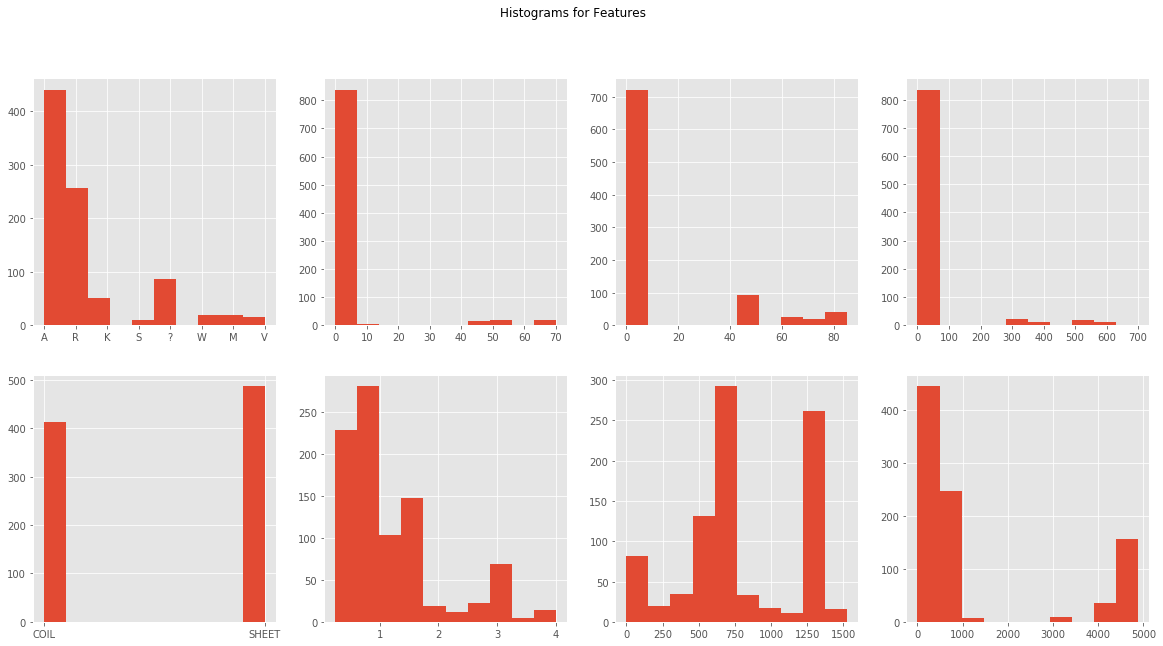

In [12]:
X = X.values
plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.hist(X[:,0])
plt.subplot(242)
plt.hist(X[:,1])
plt.subplot(243)
plt.hist(X[:,2])
plt.subplot(244)
plt.hist(X[:,3])

plt.subplot(245)
plt.hist(X[:,4])
plt.subplot(246)
plt.hist(X[:,5])
plt.subplot(247)
plt.hist(X[:,6])
plt.subplot(248)
plt.hist(X[:,7])
plt.suptitle('Histograms for Features')
plt.show()

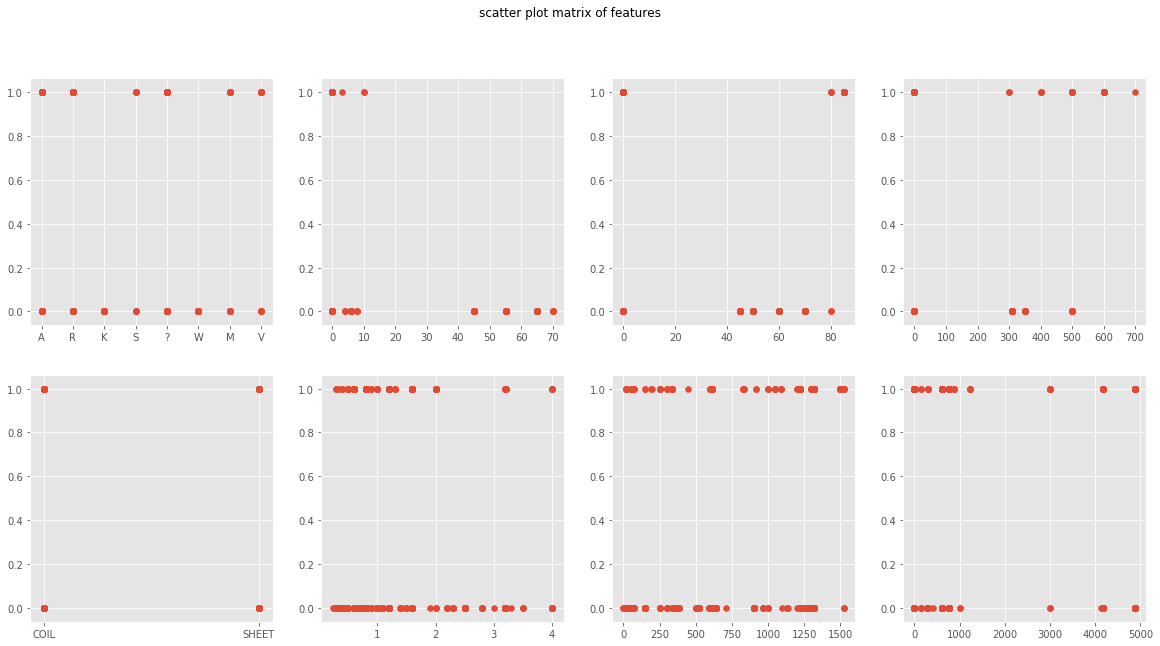

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.scatter(X[:,0],y)
plt.subplot(242)
plt.scatter(X[:,1],y)
plt.subplot(243)
plt.scatter(X[:,2],y)
plt.subplot(244)
plt.scatter(X[:,3],y)
plt.subplot(245)
plt.scatter(X[:,4],y)
plt.subplot(246)
plt.scatter(X[:,5],y)
plt.subplot(247)
plt.scatter(X[:,6],y)
plt.subplot(248)
plt.scatter(X[:,7],y)
plt.suptitle('scatter plot matrix of features')
plt.show()

## Training

### Gaussian mixture model

In [14]:
from sklearn import mixture

best_gmm = mixture.GaussianMixture()
best_gmm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Text(0.5, 1.0, 'Hel')

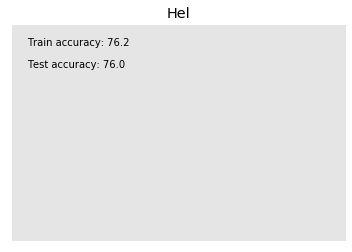

In [15]:
y_train_pred = best_gmm.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy)

y_test_pred = best_gmm.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy)

plt.xticks(())
plt.yticks(())
plt.title("Hel")

### Logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/wxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.77

## Draw likelihood plot

In [18]:
asd=clf.predict_proba(X_new)
asd

array([[0.93732575, 0.06267425],
       [0.66059181, 0.33940819],
       [0.70736657, 0.29263343],
       ...,
       [0.34935546, 0.65064454],
       [0.70643681, 0.29356319],
       [0.65307459, 0.34692541]])

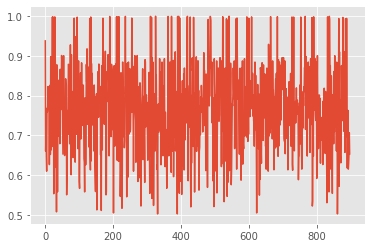

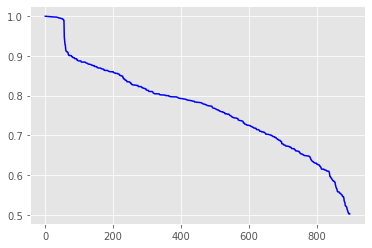

In [19]:
value=[]
index=[]
for i,er in enumerate(asd):
    value.append(np.max(er))
    index.append(i)
    
plt.plot(index,value)
plt.show()
value.sort(reverse=True)
plt.plot(index,value,color='blue')#likelihood plot
plt.show()

# Report


## Q: What features are most useful for solving the problem and why, how features are distributed in the data:  



Many features of this dataset contain a large number of missing values, and their reference value is very low, so first of all, I delete these features with too many missing values.

- Useful Features: steel、carbon、hardness、strength、shape、thicklen.

## Q: Try to change parameters of training to achieve better results

Gaussian Mixture model has highest accuracy about 76%

Logistic Regression model has highest accuracy about 77%